In [64]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [65]:
from get_aq_data import get_flo_data, ID_to_name, TICKS_TWO_HOURLY

In [66]:
data, hourly_mean, daily_mean = get_flo_data()

In [67]:
subset = data['2019-05-01':]
subset = subset.mean(axis=1)
just_sundays = subset[subset.index.dayofweek == 6].to_frame('Mean')

In [68]:
just_sundays['Marathon'] = 'Non-Marathon'
just_sundays.loc['2019-05-05', 'Marathon'] = 'Marathon'
just_sundays.loc['2019-07-21', 'Marathon'] = 'Just Ride'

In [69]:
marathon = just_sundays[just_sundays['Marathon'] == 'Marathon']
marathon = marathon.groupby(marathon.index.time).mean()
just_ride = just_sundays[just_sundays['Marathon'] == 'Just Ride']
just_ride = just_ride.groupby(just_ride.index.time).mean()
non_marathon = just_sundays[just_sundays['Marathon'] == 'Non-Marathon'].copy()
non_marathon_mean = non_marathon.groupby(non_marathon.index.time).mean()
non_marathon_std = non_marathon.groupby(non_marathon.index.time).std()

In [70]:
non_marathon['Date'] = non_marathon.index.date
non_marathon['Time'] = non_marathon.index.time

In [71]:
non_marathon_all_lines = non_marathon.pivot(columns='Date', index='Time', values='Mean')

In [72]:
cols = ["_" + str(x) for x in non_marathon_all_lines.columns]
cols[0] = "Other Sundays"
non_marathon_all_lines.columns = cols

In [73]:
marathon = marathon['Mean']
just_ride = just_ride['Mean']
non_marathon_mean = non_marathon_mean['Mean']
non_marathon_std = non_marathon_std['Mean']

/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11348ba90> has a label of '_2019-05-19' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11348bba8> has a label of '_2019-05-26' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11348be80> has a label of '_2019-06-02' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2

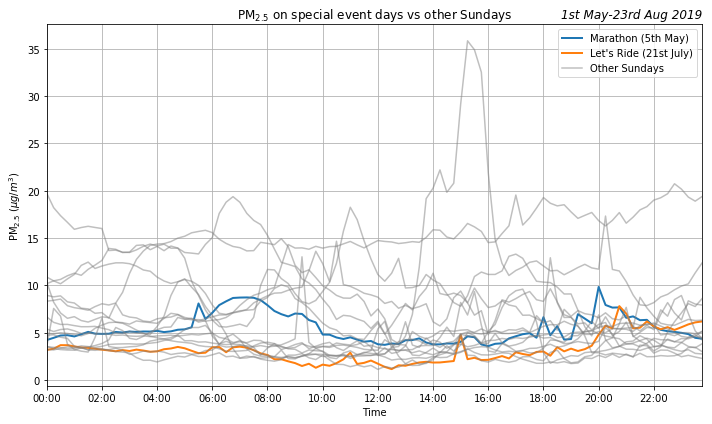

In [74]:
ax = marathon.plot(label='Marathon (5th May)', figsize=(10,6), linewidth=2)
just_ride.plot(ax=ax, label="Let's Ride (21st July)", linewidth=2)
non_marathon_all_lines.plot(ax=ax, color='gray', alpha=0.5, label="_Blah")
plt.legend()
#filled_top = non_marathon_mean + non_marathon_std
#filled_bottom = non_marathon_mean - non_marathon_std
#filled_bottom[filled_bottom < 0] = 0
#plt.fill_between(non_marathon_mean.index, filled_bottom, filled_top, alpha=0.2, color='C1')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on special event days vs other Sundays')
plt.title('1st May-23rd Aug 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Time')
plt.xticks(TICKS_TWO_HOURLY)
plt.grid()
plt.tight_layout()
plt.savefig('graphs/SpecialEvent_TimeSeries_MayOnwards_WithAllOtherDays.png', dpi=300)

/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x113268208> has a label of '_2019-05-19' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1132b91d0> has a label of '_2019-05-26' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x113268da0> has a label of '_2019-06-02' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2

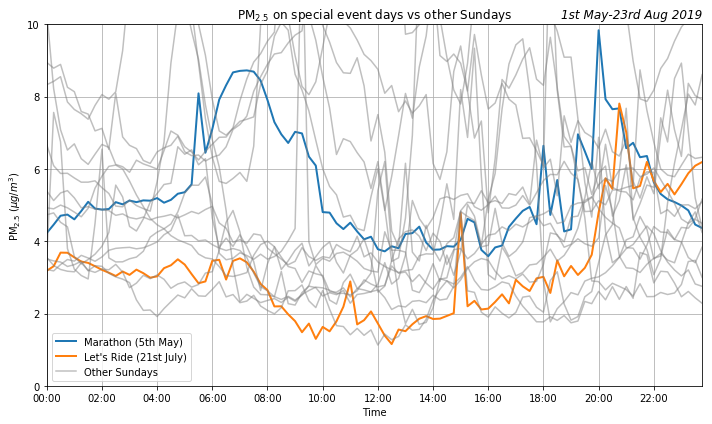

In [75]:
ax = marathon.plot(label='Marathon (5th May)', figsize=(10,6), linewidth=2)
#non_marathon_mean.plot(ax=ax, label='Other Sundays ($\pm$ 1SD)')
just_ride.plot(ax=ax, label="Let's Ride (21st July)", linewidth=2)
non_marathon_all_lines.plot(ax=ax, color='gray', alpha=0.5, label="_Blah")
plt.legend()
#filled_top = non_marathon_mean + non_marathon_std
#filled_bottom = non_marathon_mean - non_marathon_std
#filled_bottom[filled_bottom < 0] = 0
#plt.fill_between(non_marathon_mean.index, filled_bottom, filled_top, alpha=0.2, color='C1')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on special event days vs other Sundays')
plt.title('1st May-23rd Aug 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Time')
plt.ylim(0, 10)
plt.xticks(TICKS_TWO_HOURLY)
plt.grid()
plt.tight_layout()
plt.savefig('graphs/SpecialEvent_TimeSeries_MayOnwards_WithAllOtherDays_Zoomed.png', dpi=300)